<a href="https://colab.research.google.com/github/HusseinIssaOp/SeniorProjectISD/blob/main/Apple_TensorFlow_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
la = list(uploaded.keys())[0]


Saving AAPL.csv to AAPL.csv


In [73]:
import pandas as pd
data = pd.read_csv(la)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10796,2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000
10797,2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100
10798,2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56743100
10799,2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
10800,2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52472600


In [5]:

# installed it for indicators
!pip install pandas_ta
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=c5303b7d12cde303270e5d706bab5dc9e47937ca6b669742f0d9c37ebee28739
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [74]:
# technical indictaors models for analysis 12/12/2023

data['RSI']=ta.rsi(data.Close, length=10) #speed of price movemmmnt
data['EMAF']=ta.ema(data.Close, length=50)
data['EMAM']=ta.ema(data.Close, length=90)
data['EMAS']=ta.ema(data.Close, length=140) #length is the previous days depending
data['TargetNextClose'] = data['Adj Close'].shift(-1)
#moving averages fast/mid/slow

In [75]:
data.dropna(inplace=True)

data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

  # not using these columns trying with them

In [76]:
data.dropna(inplace=True)

In [77]:
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
139,0.114955,0.115513,0.114955,0.089072,23.013104,0.130508,0.129773,0.127144,0.086046
140,0.112165,0.112165,0.111049,0.086046,20.081492,0.129744,0.129362,0.126916,0.086910
141,0.112165,0.113281,0.112165,0.086910,23.187845,0.129055,0.128984,0.126707,0.090369
142,0.116629,0.117188,0.116629,0.090369,34.502594,0.128568,0.128712,0.126564,0.083451
143,0.108259,0.108259,0.107701,0.083451,25.993737,0.127749,0.128251,0.126296,0.076965
...,...,...,...,...,...,...,...,...,...
10795,176.809998,179.050003,175.800003,178.990005,60.639399,178.300201,177.942839,174.972904,178.389999
10796,178.100006,179.720001,177.949997,178.389999,58.440132,178.303722,177.952667,175.021374,179.800003
10797,178.199997,179.850006,177.600006,179.800003,62.035346,178.362400,177.993267,175.089156,180.710007
10798,180.070007,182.339996,179.039993,180.710007,64.252888,178.454463,178.052976,175.168884,178.850006


In [78]:
data.tail(20)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
10780,176.479996,179.380005,176.169998,177.970001,46.040296,181.532880,179.367923,175.125996,179.070007
10781,177.520004,179.630005,177.130005,179.070007,48.839563,181.436297,179.361376,175.181940,175.490005
10782,179.259995,179.699997,175.399994,175.490005,41.124773,181.203109,179.276291,175.186309,173.929993
10783,174.550003,176.300003,173.860001,173.929993,38.202966,180.917889,179.158790,175.168489,174.789993
10784,174.669998,177.080002,174.050003,174.789993,40.780138,180.677579,179.062772,175.163121,176.080002
10785,174.199997,176.970001,174.149994,176.080002,44.628815,180.497282,178.997217,175.176126,171.960007
10786,174.820007,175.199997,171.660004,171.960007,36.265176,180.162487,178.842553,175.130507,170.429993
10787,172.619995,173.039993,169.050003,170.429993,33.662153,179.780820,178.657661,175.063833,170.690002
10788,169.339996,172.029999,167.619995,170.690002,34.549214,179.424318,178.482548,175.001793,171.210007
10789,172.020004,173.070007,170.339996,171.210007,36.437931,179.102188,178.322712,174.948009,173.750000


In [79]:
data_set = data.iloc[:, 0:10]
data_set.tail()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
10795,176.809998,179.050003,175.800003,178.990005,60.639399,178.300201,177.942839,174.972904,178.389999
10796,178.100006,179.720001,177.949997,178.389999,58.440132,178.303722,177.952667,175.021374,179.800003
10797,178.199997,179.850006,177.600006,179.800003,62.035346,178.362400,177.993267,175.089156,180.710007
10798,180.070007,182.339996,179.039993,180.710007,64.252888,178.454463,178.052976,175.168884,178.850006
10799,181.419998,181.929993,178.139999,178.850006,56.727735,178.469974,178.070493,175.221099,178.720001


In [80]:
from sklearn.preprocessing import MinMaxScaler

    #because im using neural networks so btw 0 and 1
zz = MinMaxScaler(feature_range=(0,1))
data_set_scaled = zz.fit_transform(data_set)
print(data_set_scaled)

[[3.32789066e-04 3.32263044e-04 3.37282688e-04 ... 3.71739130e-04
  3.41083397e-04 2.44694001e-04]
 [3.18568182e-04 3.15369339e-04 3.17275608e-04 ... 3.69450509e-04
  3.39779950e-04 2.49098860e-04]
 [3.18568182e-04 3.21000574e-04 3.22991917e-04 ... 3.67348592e-04
  3.38585368e-04 2.66733591e-04]
 ...
 [9.08048439e-01 9.07256235e-01 9.09440597e-01 ... 9.89528846e-01
  9.99246702e-01 9.21104758e-01]
 [9.17580050e-01 9.19820499e-01 9.16816412e-01 ... 9.89860905e-01
  9.99701893e-01 9.11622070e-01]
 [9.24461077e-01 9.17751661e-01 9.12206517e-01 ... 9.89958324e-01
  1.00000000e+00 9.10959276e-01]]


In [81]:
print(data_set_scaled.shape[0])

10661


In [82]:
X = []

backcandles = 20      # choosing how many days before to predict it


for j in range(8):                     # the first 8 columns are the input
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])



In [83]:

  #stackoverflow helping the this line due to error
X=np.moveaxis(X, [0], [2])


X, yt =np.array(X), np.array(data_set_scaled[backcandles:,-1])  # chosing col -1 target
y=np.reshape(yt,(len(yt),1))


In [84]:

print(X)
print(X.shape)


[[[3.32789066e-04 3.32263044e-04 3.37282688e-04 ... 3.80297730e-04
   3.71739130e-04 3.41083397e-04]
  [3.18568182e-04 3.15369339e-04 3.17275608e-04 ... 3.76209228e-04
   3.69450509e-04 3.39779950e-04]
  [3.18568182e-04 3.21000574e-04 3.22991917e-04 ... 3.72515547e-04
   3.67348592e-04 3.38585368e-04]
  ...
  [2.98658945e-04 2.95660017e-04 3.00126683e-04 ... 3.20463011e-04
   3.33533934e-04 3.17478646e-04]
  [2.90126415e-04 2.87213164e-04 2.91552220e-04 ... 3.17665778e-04
   3.31471164e-04 3.16103324e-04]
  [3.07191475e-04 3.09738104e-04 3.11559300e-04 ... 3.15798945e-04
   3.29931147e-04 3.15063827e-04]]

 [[3.18568182e-04 3.15369339e-04 3.17275608e-04 ... 3.76209228e-04
   3.69450509e-04 3.39779950e-04]
  [3.18568182e-04 3.21000574e-04 3.22991917e-04 ... 3.72515547e-04
   3.67348592e-04 3.38585368e-04]
  [3.41321596e-04 3.40714942e-04 3.45857151e-04 ... 3.69904663e-04
   3.65838493e-04 3.37769237e-04]
  ...
  [2.90126415e-04 2.87213164e-04 2.91552220e-04 ... 3.17665778e-04
   3.31471

In [85]:
print(y)
print(y.shape)

[[2.42486473e-04]
 [2.49098860e-04]
 [2.62323633e-04]
 ...
 [9.21104758e-01]
 [9.11622070e-01]
 [9.10959276e-01]]
(10641, 1)


In [86]:
splitdata =  int(len(X)*0.80) # 80% training data
print(splitdata)


8512


In [87]:
    #split training and testing using the arrays up
X_train, X_test = X[:splitdata], X[splitdata:]
y_train, y_test = y[:splitdata], y[splitdata:]

In [88]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8512, 20, 8)
(8512, 1)
(2129, 20, 8)
(2129, 1)


In [89]:
from keras.layers import LSTM

from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Dropout

from keras.models import  Sequential


import tensorflow as tf
import keras
from keras.models import Model
from keras import optimizers
from keras.callbacks import History
from keras.layers import Input, Activation, concatenate


import numpy as np
# imported all the libraries am using keras , tensorflow etc

In [90]:

lstm_input = Input(shape=(backcandles,8), name='lstm_input') #shape is 20 days with 8 columns in input
inputs = LSTM(200, name='first_layer')(lstm_input)

#200 nodes for lstm anddd 1 for dense layer
#inter mediate layer
inputs = Dense(1,name='dense_layer')(inputs)
output = Activation('linear',name='output')(inputs)

#added them to t he model <<
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam,loss='mse')


#model fir ..
model.fit(x=X_train,y=y_train,batch_size=150,epochs=100,shuffle=True, validation_data=(X_test, y_test))

Epoch 1/100
57/57 [==============================] - 10s 124ms/step - loss: 5.2835e-04 - val_loss: 0.0014
Epoch 2/100
57/57 [==============================] - 8s 143ms/step - loss: 5.5104e-06 - val_loss: 0.0025
Epoch 3/100
57/57 [==============================] - 6s 114ms/step - loss: 3.7901e-06 - val_loss: 0.0020
Epoch 4/100
57/57 [==============================] - 8s 138ms/step - loss: 3.0537e-06 - val_loss: 0.0017
Epoch 5/100
57/57 [==============================] - 6s 113ms/step - loss: 2.5436e-06 - val_loss: 0.0011
Epoch 6/100
57/57 [==============================] - 8s 139ms/step - loss: 2.1932e-06 - val_loss: 5.9207e-04
Epoch 7/100
57/57 [==============================] - 6s 109ms/step - loss: 2.0249e-06 - val_loss: 4.7248e-04
Epoch 8/100
57/57 [==============================] - 8s 138ms/step - loss: 1.8049e-06 - val_loss: 4.0102e-04
Epoch 9/100
57/57 [==============================] - 7s 116ms/step - loss: 1.6681e-06 - val_loss: 4.1022e-04
Epoch 10/100
57/57 [==================

In [91]:
y_pred = model.predict(X_test)

for i in range(10):
  print(y_pred[i], y_test[i])

67/67 [==============================] - 2s 17ms/step
[0.14268707] [0.14741436]
[0.14474155] [0.14408827]
[0.14560348] [0.1431822]
[0.14351885] [0.14406903]
[0.14207833] [0.14678705]
[0.14182188] [0.14528984]
[0.14403246] [0.14477156]
[0.14357878] [0.14493283]
[0.14294183] [0.14831882]
[0.14306271] [0.14811153]


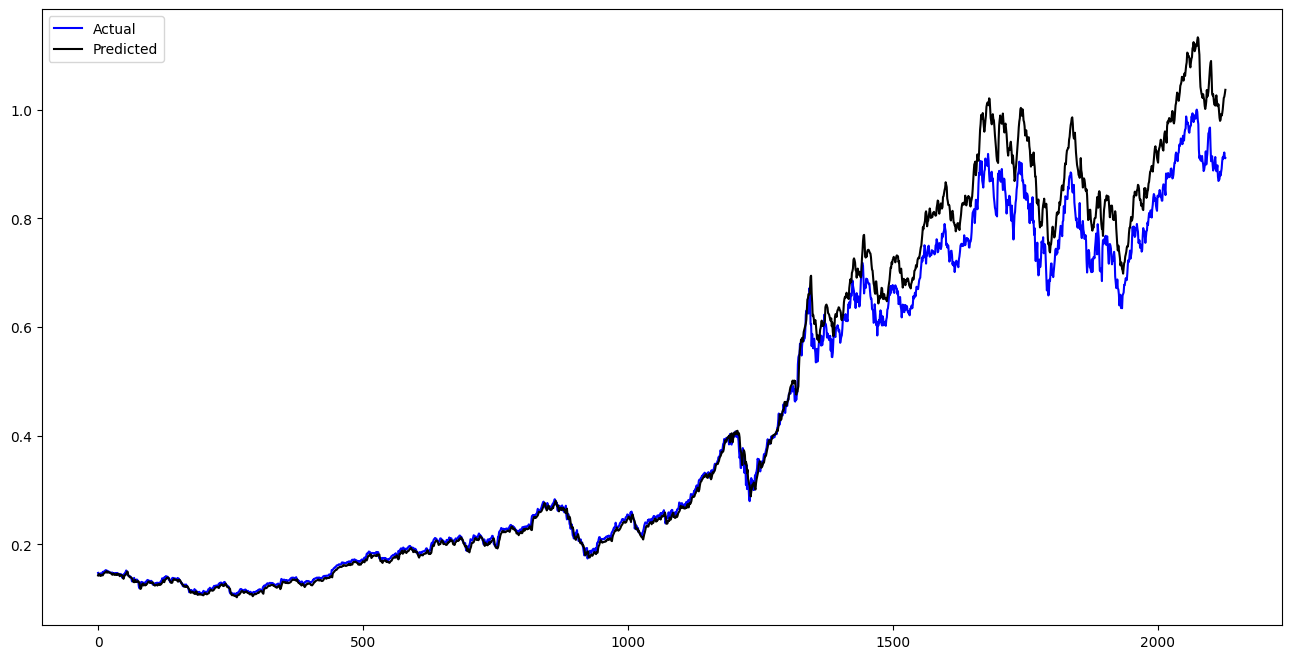

In [102]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = "blue", label='Actual')
plt.plot(y_pred, color = "black", label='Predicted')
plt.legend()
plt.show()

In [93]:


from sklearn.preprocessing import MinMaxScaler

data_reshaped = data_set.TargetNextClose.values.reshape(-1, 1)

zz.fit(data_reshaped)


y_pred_original = zz.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = zz.inverse_transform(y_test.reshape(-1, 1)).flatten()

indices = range(700, 1000)
for i in indices:
    print(f"Prediction: {y_pred_original[i]}, Actual: {y_test_original[i]}")

Prediction: 36.68647384643555, Actual: 38.672943
Prediction: 36.37256622314453, Actual: 39.060352
Prediction: 37.30634689331055, Actual: 39.78051
Prediction: 37.8160514831543, Actual: 41.116295
Prediction: 38.387901306152344, Actual: 40.983185
Prediction: 39.46199035644531, Actual: 40.845325
Prediction: 39.860992431640625, Actual: 40.659931
Prediction: 39.9312629699707, Actual: 40.999821
Prediction: 39.86839294433594, Actual: 41.712864
Prediction: 40.04231262207031, Actual: 42.537609
Prediction: 40.53059768676758, Actual: 42.399754
Prediction: 41.21151351928711, Actual: 42.335583
Prediction: 41.46137619018555, Actual: 41.594025
Prediction: 41.56288528442383, Actual: 41.881622
Prediction: 40.950111389160156, Actual: 42.026592
Prediction: 40.84266662597656, Actual: 41.990944
Prediction: 40.991790771484375, Actual: 41.601151
Prediction: 41.126583099365234, Actual: 42.055111
Prediction: 40.765533447265625, Actual: 42.777668
Prediction: 41.05677032470703, Actual: 43.191235
Prediction: 41.68

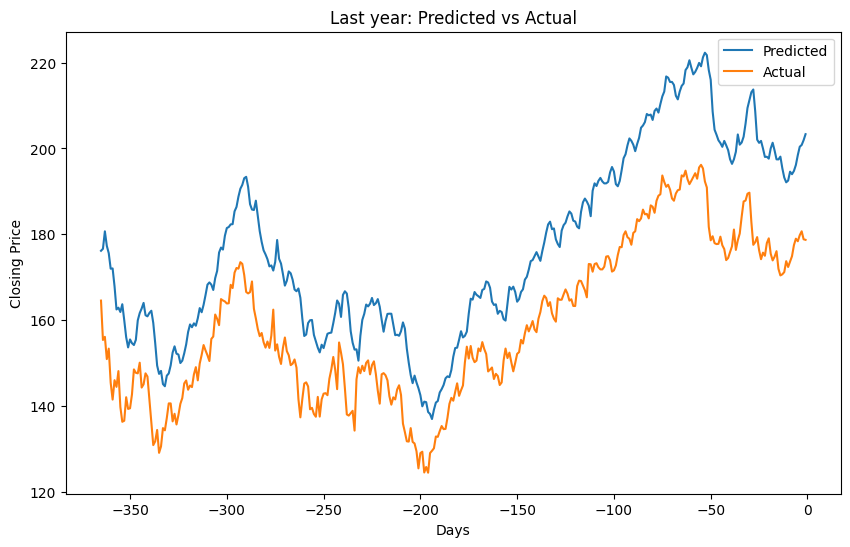

In [99]:



import matplotlib.pyplot as plt


data_reshaped = data_set.TargetNextClose.values.reshape(-1, 1)

zz.fit(data_reshaped)

y_pred_original = zz.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = zz.inverse_transform(y_test.reshape(-1, 1)).flatten()

last_365_indices = range(-365, 0)

plt.figure(figsize=(10, 6))
plt.plot(last_365_indices, y_pred_original[last_365_indices], label='Predicted')
plt.plot(last_365_indices, y_test_original[last_365_indices], label='Actual')
plt.title('Last year: Predicted vs Actual')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [95]:
from sklearn.metrics import mean_absolute_error, r2_score

mse = model.evaluate(X_test, y_test, verbose=0)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}') #low error good
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 0.002620966639369726
Mean Absolute Error (MAE): 0.03209960880554656
R-squared: 0.9666153032328786
